In [1]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/support_vector_machines

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 236, done.
remote: Counting objects: 100% (236/236), done.
remote: Compressing objects: 100% (173/173), done.
remote: Total 236 (delta 112), reused 184 (delta 60), pack-reused 0
Receiving objects: 100% (236/236), 35.88 MiB | 15.31 MiB/s, done.
Resolving deltas: 100% (112/112), done.
Updating files: 100% (51/51), done.
/content/machine_learning_1/support_vector_machines


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils
from sklearn.svm import SVC,SVR
import random

# Building an SVM to separate a linear dataset

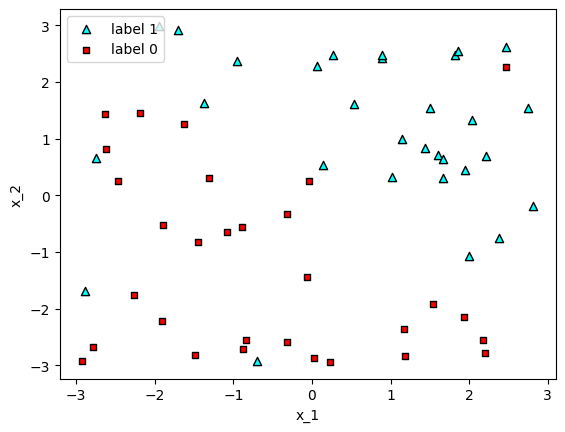

In [21]:
# Loading the linear dataset

linear_data = pd.read_csv('linear.csv')
features = np.array(linear_data[['x_1', 'x_2']])
labels = np.array(linear_data['y'])
utils.plot_points(features, labels)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = scaler.fit_transform(features)

Accuracy: 0.9333333333333333


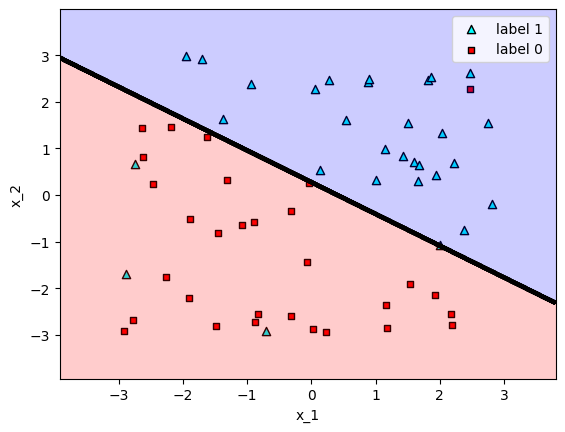

In [22]:
from sklearn.svm import SVC
#use linear SVM
svm_linear = SVC(kernel='linear')
svm_linear.fit(features , labels)


print("Accuracy:", svm_linear.score(features, labels))
utils.plot_model(features, labels, svm_linear)

C = 0.01
Accuracy: 0.9333333333333333


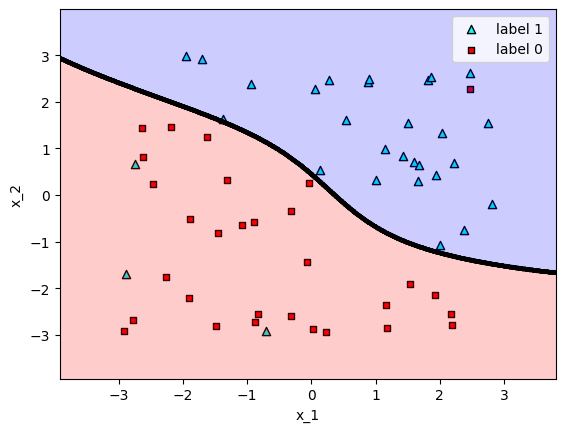

C = 100
Accuracy: 0.95


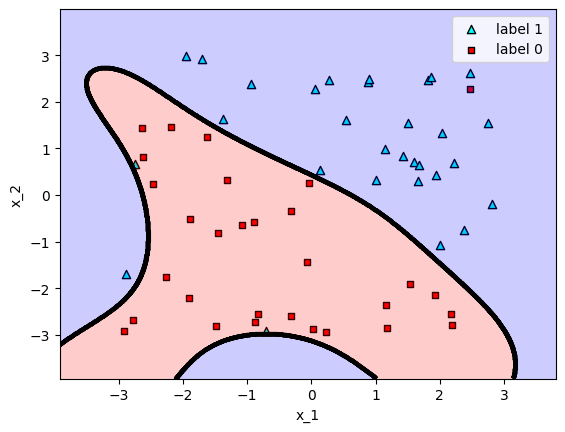

In [23]:
# use linear SVM with C = 0.01

svm_c_001 = SVC(kernel='rbf')
svm_c_001.fit(features , labels)


print("C = 0.01")
print("Accuracy:", svm_c_001.score(features, labels))
utils.plot_model(features, labels, svm_c_001)

# use linear SVM with C = 100
svm_c_100 =  SVC(kernel='rbf' , C=100)
svm_c_100.fit(features , labels)


print("C = 100")
print("Accuracy:", svm_c_100.score(features, labels))
utils.plot_model(features, labels, svm_c_100)

# Building polynomial kernels for a circular dataset

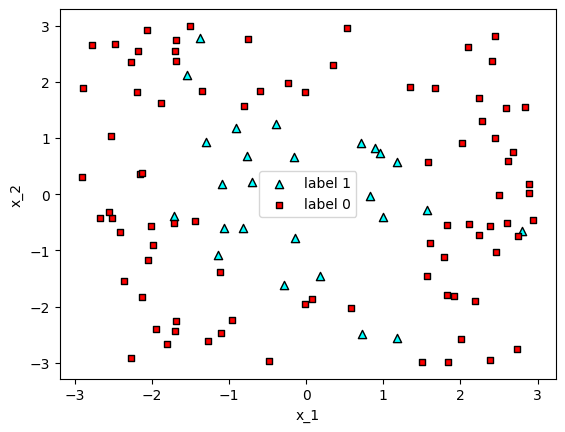

In [24]:
# Loading the one_circle dataset

circular_data = pd.read_csv('one_circle.csv')
features = np.array(circular_data[['x_1', 'x_2']])
labels = np.array(circular_data['y'])
utils.plot_points(features, labels)

Polynomial kernel of degree = 2
Accuracy: 0.8909090909090909


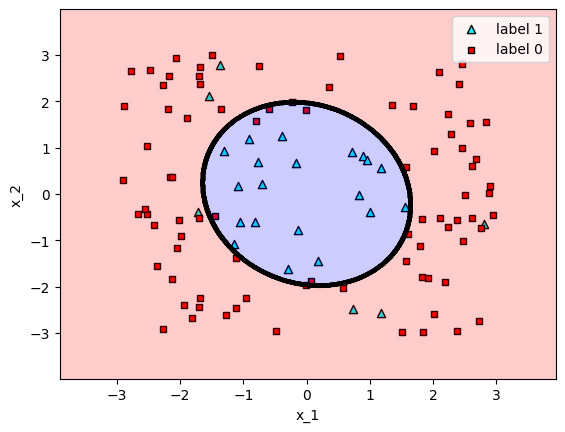

Polynomial kernel of degree = 4
Accuracy: 0.9


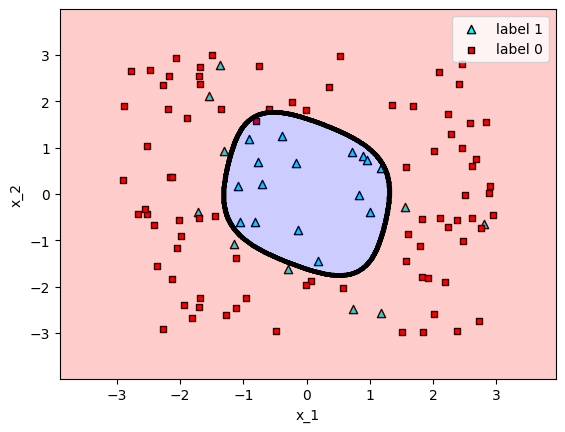

In [25]:
# use poly SVM with Degree = 2
svm_degree_2 = SVC(kernel='poly' , degree=2 )
svm_degree_2.fit(features , labels)


print("Polynomial kernel of degree = 2")
print("Accuracy:", svm_degree_2.score(features, labels))
utils.plot_model(features, labels, svm_degree_2)

# use poly SVM with Degree = 4
svm_degree_4 = SVC(kernel='poly' , degree=4 )
svm_degree_4.fit(features , labels)

print("Polynomial kernel of degree = 4")
print("Accuracy:", svm_degree_4.score(features, labels))
utils.plot_model(features, labels, svm_degree_4)

# Experimenting with gammas in the rbf kernel

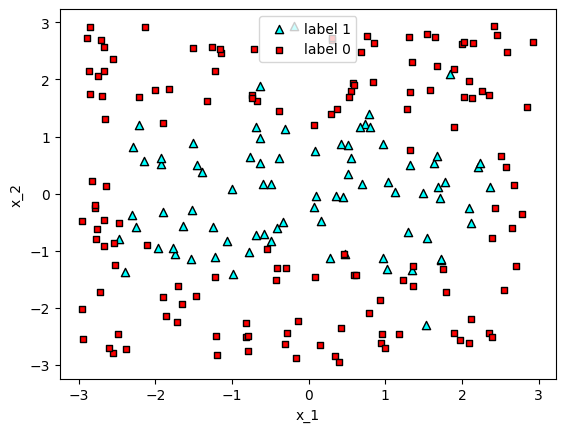

In [26]:
# Loading the two_circles dataset

two_circles_data = pd.read_csv('two_circles.csv')
features = np.array(two_circles_data[['x_1', 'x_2']])
labels = np.array(two_circles_data['y'])
utils.plot_points(features, labels)

Gamma = 0.1
Accuracy: 0.8772727272727273


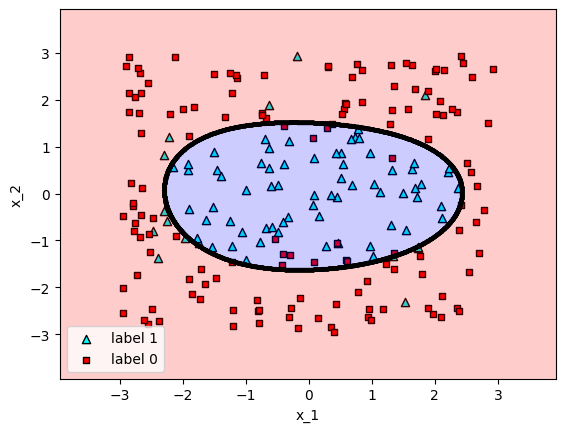

Gamma = 1
Accuracy: 0.9045454545454545


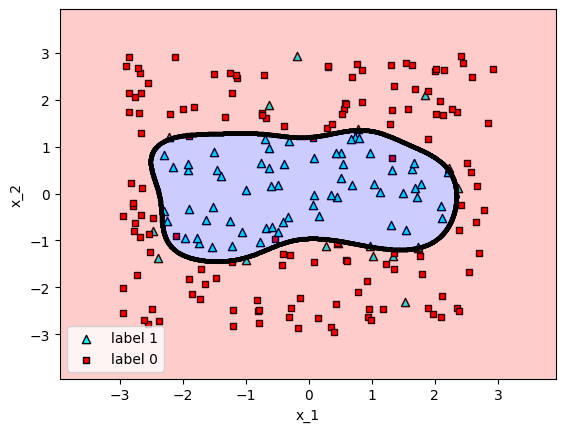

Gamma = 10
Accuracy: 0.9636363636363636


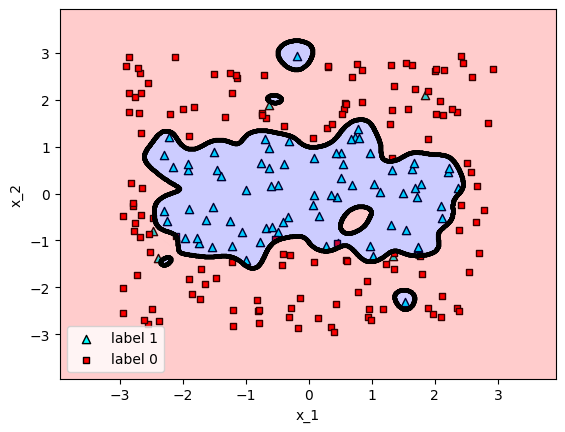

Gamma = 100
Accuracy: 0.990909090909091


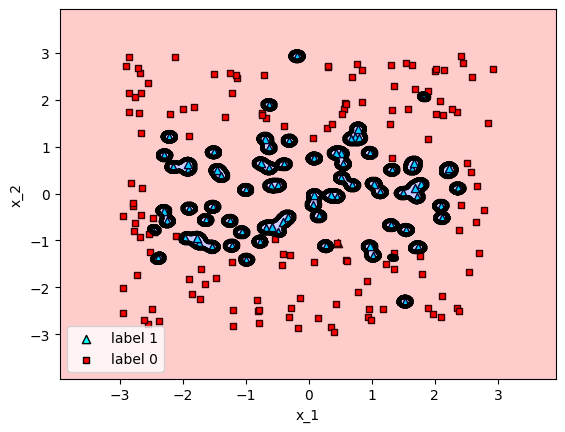

In [28]:
# use SVM rbf with gamma = 0.1
svm_gamma_01 = SVC(kernel='rbf' , gamma = 0.1 )
svm_gamma_01.fit(features , labels)

print("Gamma = 0.1")
print("Accuracy:", svm_gamma_01.score(features, labels))
utils.plot_model(features, labels, svm_gamma_01)

# use SVM rbf with gamma = 1
svm_gamma_1 = SVC(kernel='rbf' , gamma = 1 )
svm_gamma_1.fit(features , labels)


print("Gamma = 1")
print("Accuracy:", svm_gamma_1.score(features, labels))
utils.plot_model(features, labels, svm_gamma_1)

# use SVM rbf with gamma = 10
svm_gamma_10 = SVC(kernel='rbf' , gamma = 10 )
svm_gamma_10.fit(features , labels)


print("Gamma = 10")
print("Accuracy:", svm_gamma_10.score(features, labels))
utils.plot_model(features, labels, svm_gamma_10)

# use SVM rbf with gamma = 100
svm_gamma_100 = SVC(kernel='rbf' , gamma = 100 )
svm_gamma_100.fit(features , labels)

print("Gamma = 100")
print("Accuracy:", svm_gamma_100.score(features, labels))
utils.plot_model(features, labels, svm_gamma_100)

### Real Example (Breast Cancer)

In [2]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [50]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.metrics as sk_metrics
import tempfile
import os

# Preset matplotlib figure sizes.
matplotlib.rcParams['figure.figsize'] = [9, 6]

In [51]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'

features = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness',
            'concavity', 'concave_poinits', 'symmetry', 'fractal_dimension']
column_names = ['id', 'diagnosis']

for attr in ['mean', 'ste', 'largest']:
  for feature in features:
    column_names.append(feature + "_" + attr)

In [52]:
dataset = pd.read_csv(url, names=column_names)
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_poinits_mean,...,radius_largest,texture_largest,perimeter_largest,area_largest,smoothness_largest,compactness_largest,concavity_largest,concave_poinits_largest,symmetry_largest,fractal_dimension_largest
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [53]:
train_dataset = dataset.sample(frac=0.75, random_state=1)
test_dataset = dataset.drop(train_dataset.index)
# The `id` column can be dropped since each row is unique
x_train, y_train = train_dataset.iloc[:, 2:], train_dataset.iloc[:, 1]
x_test, y_test = test_dataset.iloc[:, 2:], test_dataset.iloc[:, 1]

In [54]:
y_train, y_test = y_train.map({'B': 0, 'M': 1}), y_test.map({'B': 0, 'M': 1})

In [55]:
# use all data with standard scaler
# use "sag" solver
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver="sag")
clf.fit(preprocessing.StandardScaler().fit_transform(x_train), y_train)
clf.score(preprocessing.StandardScaler().fit_transform(x_test), y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.9859154929577465

In [56]:
# use SVM with all data with standard scaler
# try to tune parameters to reach accuracy >= logistic regression accuracy
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np
import random
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

svm1  = SVC(kernel='linear' )
svm1.fit(x_train_scaled , y_train)



SVC(kernel='linear')

In [57]:
x_train_scaled.shape

(427, 30)

In [58]:
svm1.score(x_train_scaled ,y_train )

0.9929742388758782

# Support Vector Regression (SVC)

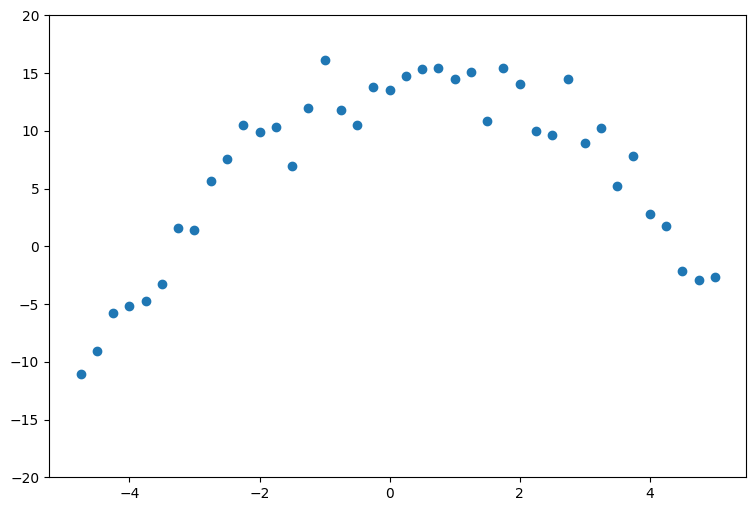

In [59]:
# Our original polynomial is -x^2+x+15
coefs = [15,1,-1]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-5, 5, 1000)

draw_polynomial(coefs)
X = []
Y = []
x=-5
for i in range(40):
    x = x+0.25
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)
X=np.array(X)
Y=np.array(Y)
plt.ylim(-20,20)
plt.scatter(X, Y)

In [60]:
X

array([-4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  , -2.75,
       -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 ,
       -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,
        2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,
        4.25,  4.5 ,  4.75,  5.  ])

In [76]:
# use poly SVR with degree 2
from sklearn.svm import SVR
svr = SVR(kernel='poly', degree=2, epsilon=.1 ,coef0=1)
svr.fit(X.reshape(-1,1), Y)
svr.score(X.reshape(-1,1) , Y)

0.940042100068023

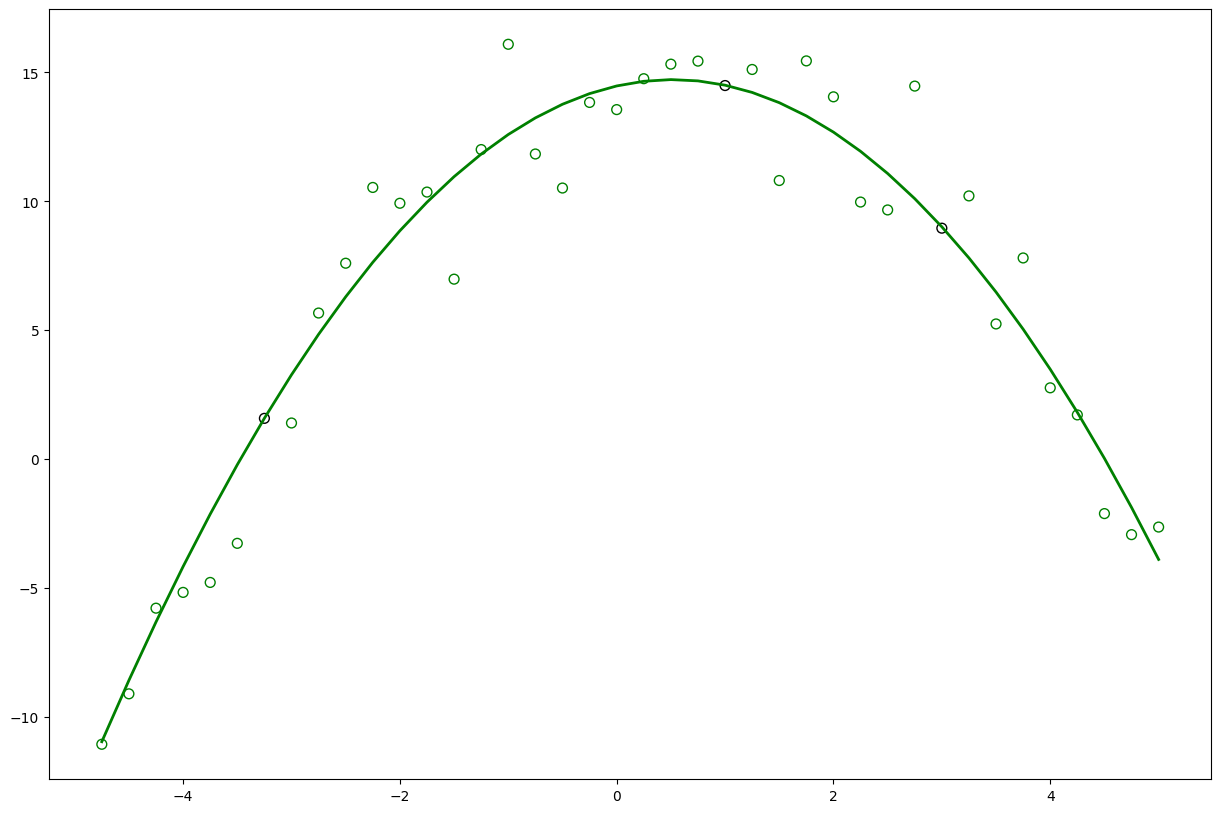

In [77]:
from sklearn.metrics import mean_squared_error
def display_results(svr,X,Y):
  X=np.array(X)
  y=np.array(Y)
  lw = 2

  svrs = ['svr_poly']
  kernel_label = ['Polynomial']
  model_color = ['g']

  fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 10), sharey=True)
  for ix, _ in enumerate(svrs):
      plt.plot(X, svr.predict(X.reshape(-1, 1)), color=model_color[ix], lw=lw,
                    label='{} model'.format(kernel_label[ix]))
      plt.scatter(X[svr.support_], y[svr.support_], facecolor="none",
                      edgecolor=model_color[ix], s=50,
                      label='{} support vectors'.format(kernel_label[ix]))
      plt.scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                      y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                      facecolor="none", edgecolor="k", s=50,
                      label='other training data')
display_results(svr,X,Y)